<a href="https://www.kaggle.com/code/lazyrook/exploratory-data-analysis?scriptVersionId=130884730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-products-dataset/myntra202305041052.csv


# 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Importing the Dataset

In [3]:
df_raw = pd.read_csv("/kaggle/input/myntra-products-dataset/myntra202305041052.csv")

# 3. Cleaning the Dataset

In [4]:
df_raw.shape

(1060213, 11)

In [5]:
df_raw.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [7]:
df_raw.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


Let's see the contents of 'asin' column

In [8]:
unique_asin = df_raw['asin'].unique()
print(unique_asin)


['-']


We can drop some of the columns which are not relevant to our analysis
- asin
- id
- img
- purl

In [9]:
df= df_raw.drop(['img', 'asin', 'purl', 'id'], axis=1)

In [10]:
df.head()

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster


Checking for missing values if any

In [11]:
missing_values = df.isnull().sum()
print(missing_values)


name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
dtype: int64


There seem to be no missing values. Therefore, we can move ahead with our analysis

# 4. EDA
First we'll do some univariate analysis for all the columns followed by multivariate analysis

In [12]:
df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   name         1060213 non-null  object 
 1   price        1060213 non-null  float64
 2   mrp          1060213 non-null  float64
 3   rating       1060213 non-null  float64
 4   ratingTotal  1060213 non-null  int64  
 5   discount     1060213 non-null  int64  
 6   seller       1060213 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 56.6+ MB


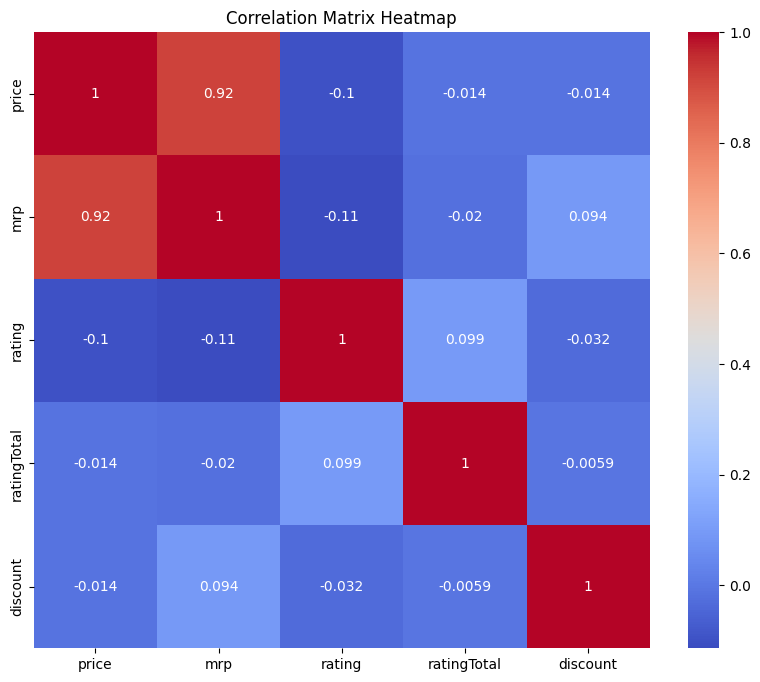

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()


Here, we can see that price and MRP have a very high +ve correlation. 

## 4.1 name (column)

In [15]:
name_counts = df['name'].value_counts()
print(name_counts)


Men Polo Collar T-shirt                    5644
Gold-Plated Jewellery Set                  5485
Men Typography Printed T-shirt             4326
Printed Round Neck T-shirt                 4055
Men Slim Fit Jeans                         4046
                                           ... 
Empire Tiered Mini Dress                      1
Women Slim Jogger Fit Jeans                   1
Mini Dress With Lace Inserts                  1
Abstract Waistline Dress                      1
Men Checked Slim Fit Cotton Track Pants       1
Name: name, Length: 217738, dtype: int64


In [16]:
# Select only the top 5 value counts
top_5_counts = name_counts.head(5)
top_5_counts

Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Name: name, dtype: int64

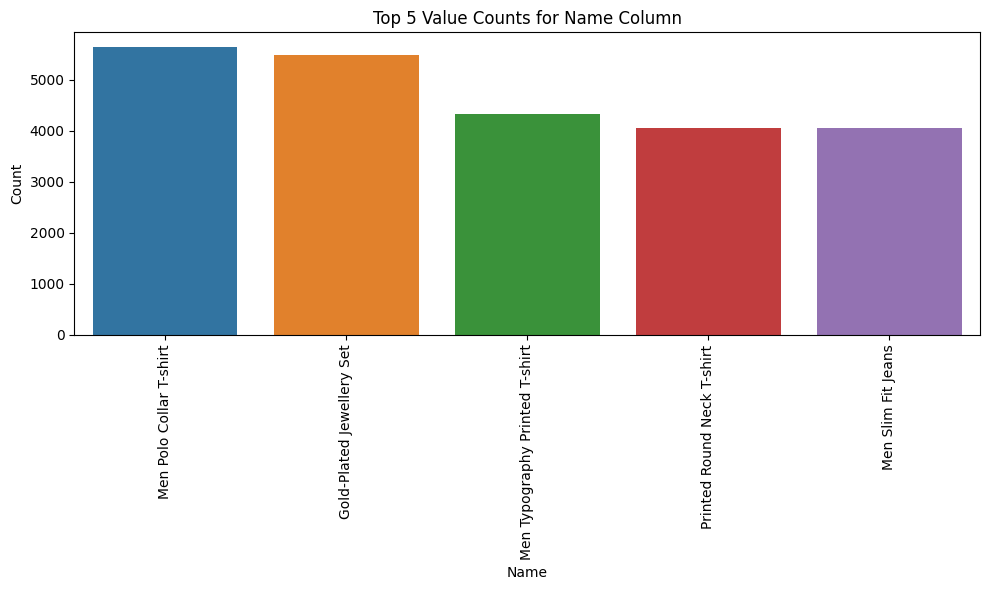

In [17]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_counts.index, y=top_5_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 5 Value Counts for Name Column')
plt.tight_layout()

# Display the plot
plt.show()

**The commonly listed product on Myntra are as folows:**
1. Men Polo Collar T-shirt           5644
2. Gold-Plated Jewellery Set         5485
3. Men Typography Printed T-shirt    4326
4. Printed Round Neck T-shirt        4055
5. Men Slim Fit Jeans                4046

## 4.2 price

In [18]:
df['price'].describe()

count    1.060213e+06
mean     1.536235e+03
std      3.051140e+03
min      2.500000e+01
25%      4.990000e+02
50%      8.110000e+02
75%      1.497000e+03
max      2.575000e+05
Name: price, dtype: float64

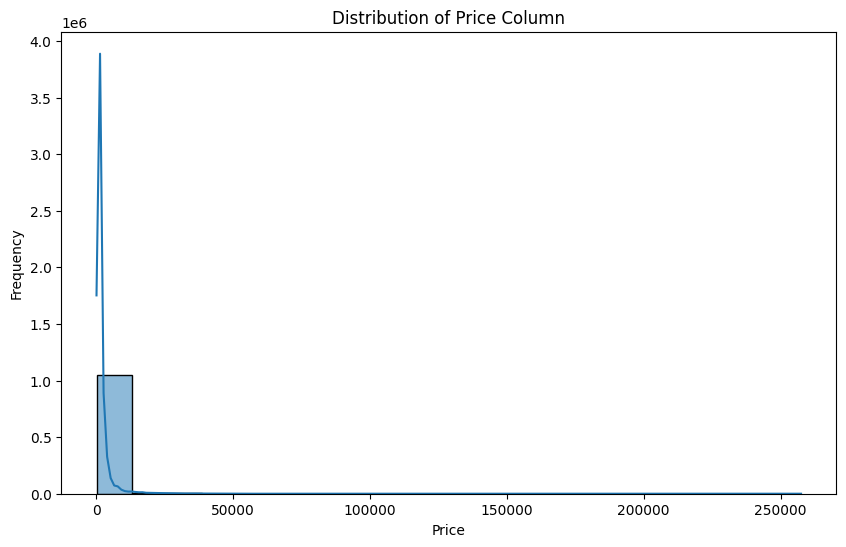

In [19]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price Column')

# Display the plot
plt.show()

Let's apply Logarithmic transformation for better understanding of the data distribution

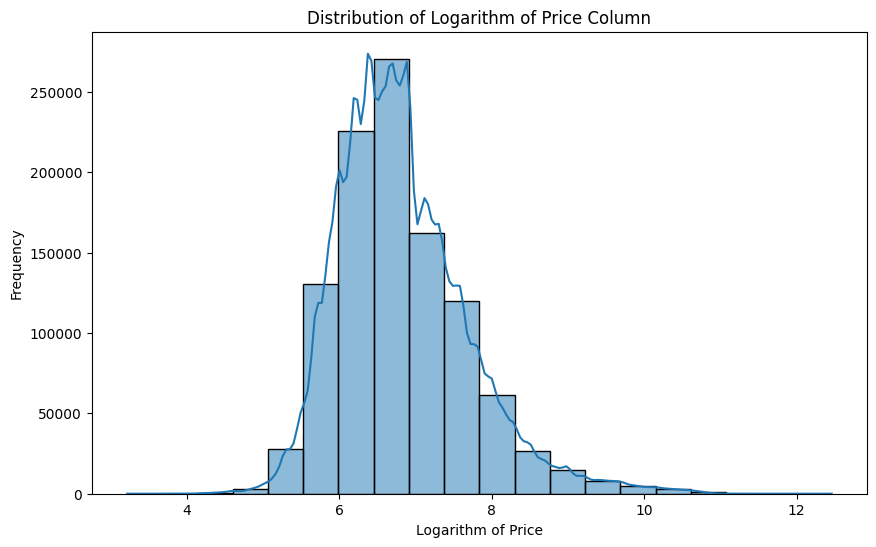

In [20]:
# Apply logarithmic transformation
log_prices = np.log(df['price'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Price')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Price Column')

# Display the plot
plt.show()

## 4.3 mrp

In [21]:
df['mrp'].describe()

count    1.060213e+06
mean     2.668379e+03
std      3.877900e+03
min      2.500000e+01
25%      9.990000e+02
50%      1.780000e+03
75%      2.999000e+03
max      2.575000e+05
Name: mrp, dtype: float64

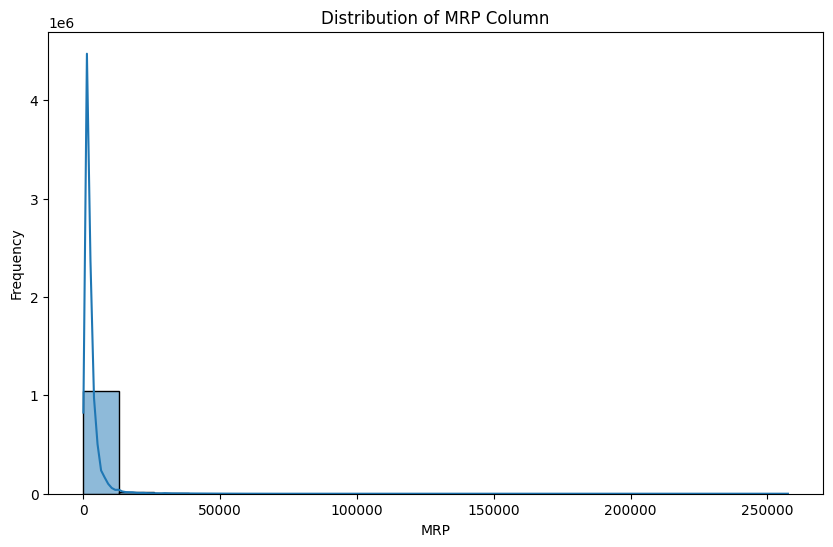

In [22]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['mrp'], bins=20, kde=True)

# Set labels and title
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.title('Distribution of MRP Column')

# Display the plot
plt.show()

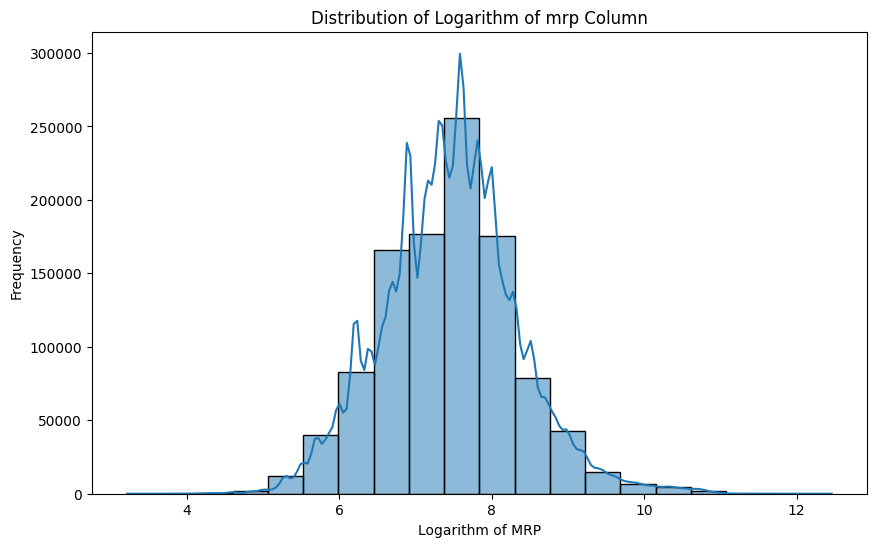

In [23]:
# Apply logarithmic transformation
log_prices = np.log(df['mrp'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of mrp Column')

# Display the plot
plt.show()

## 4.4 rating

In [24]:
df['rating'].describe()

count    1.060213e+06
mean     1.060150e+00
std      1.829632e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.800000e+00
max      5.000000e+00
Name: rating, dtype: float64

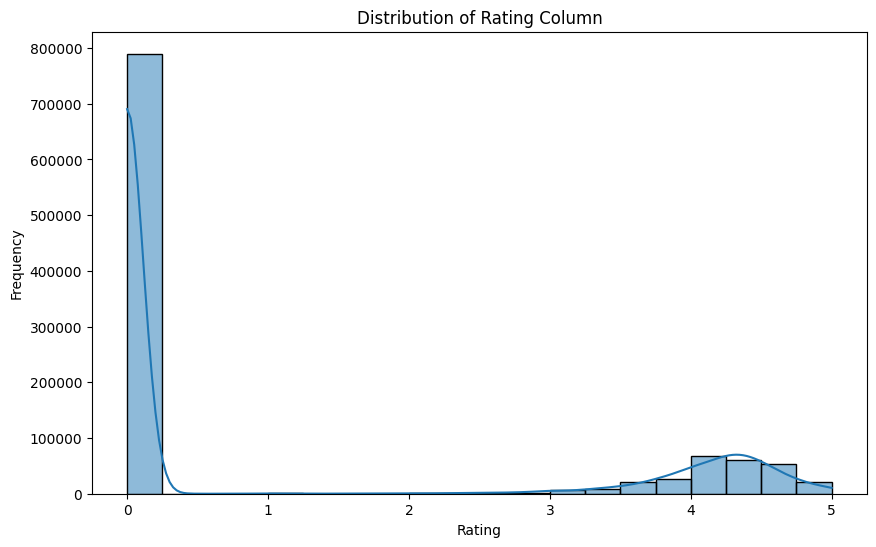

In [25]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Column')

# Display the plot
plt.show()

From the above graph we can assume that most of the product didn't receive any rating and were given a base rating of zero. Therefore, we can exclude the zero rating.

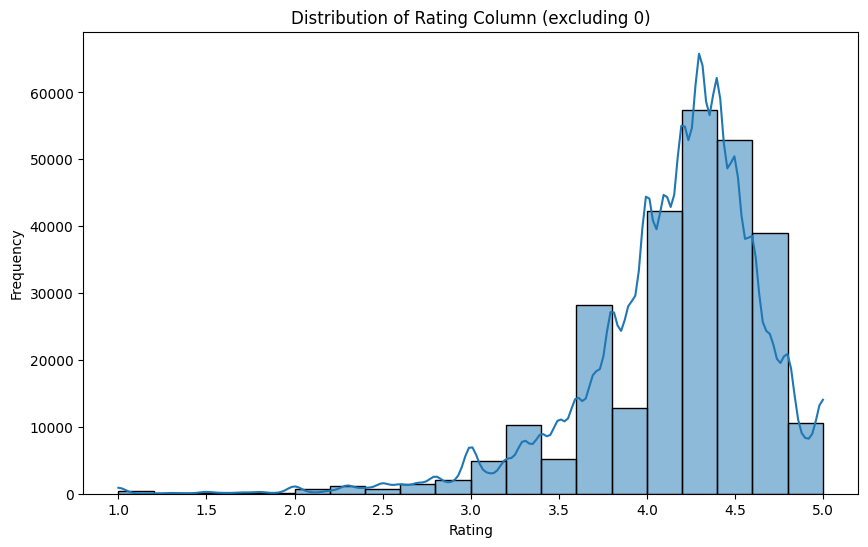

In [26]:
# Filter out the "0" values in the rating column
filtered_ratings = df[df['rating'] != 0]['rating']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_ratings, bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Column (excluding 0)')

# Display the plot
plt.show()

Maximum ratings fall between 4.0 and 4.5

## 4.5 ratingTotal

In [27]:
df['ratingTotal'].describe()

count    1.060213e+06
mean     4.189618e+01
std      7.476645e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      7.640000e+04
Name: ratingTotal, dtype: float64

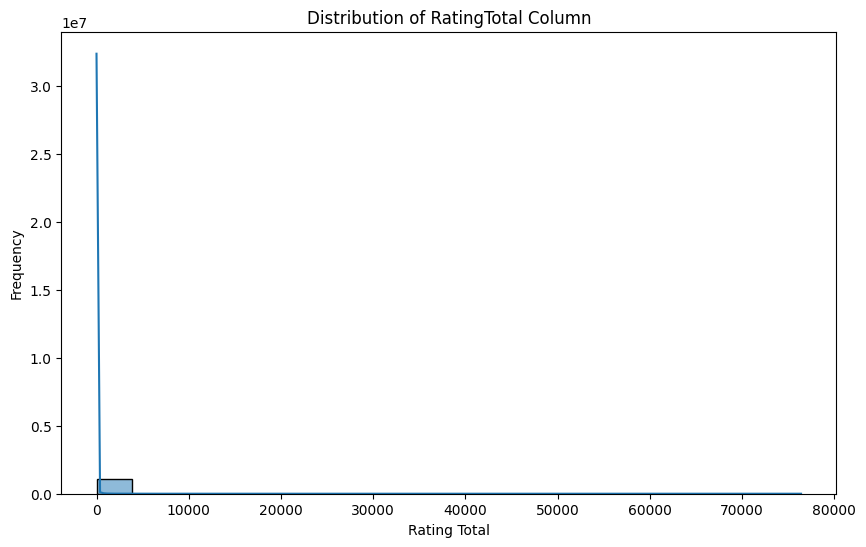

In [28]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ratingTotal'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Rating Total')
plt.ylabel('Frequency')
plt.title('Distribution of RatingTotal Column')

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


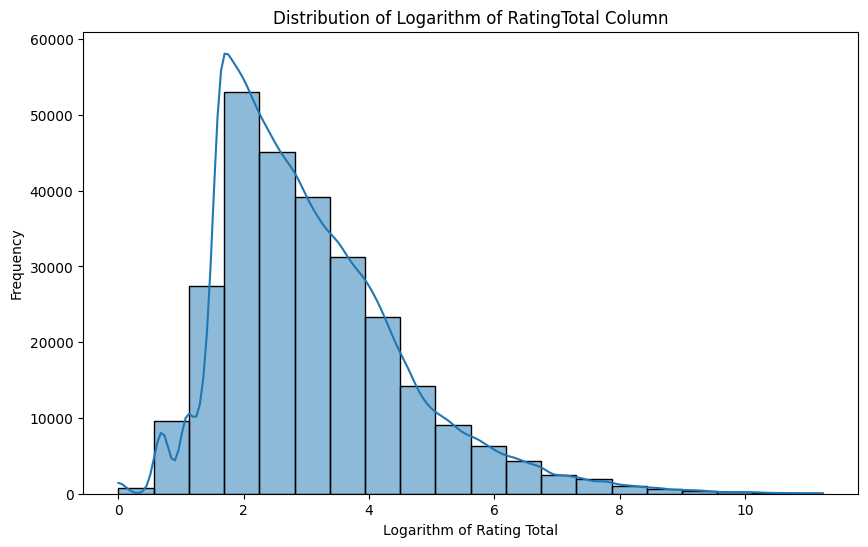

In [29]:
# Apply logarithmic transformation
log_ratingTotal = np.log(df['ratingTotal'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_ratingTotal, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Rating Total')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of RatingTotal Column')

# Display the plot
plt.show()

In [30]:
top_10_products = df.nlargest(10, 'ratingTotal')
print(top_10_products[['name', 'ratingTotal']])


                                         name  ratingTotal
271611            Toner-Lotion-Cream-Lip Balm        76400
375328            Toner-Lotion-Cream-Lip Balm        76400
950168          Men Pack of 2 Printed T-shirt        75100
254775              Unisex Skin Care Gift Set        72700
353233              Unisex Skin Care Gift Set        72700
950167             Pack Of 2 Printed T-shirts        72600
989446             Pack Of 2 Printed T-shirts        72600
990061  Pack Of 2 Printed Pure Cotton T-shirt        72500
88090            Toner-Sunscreen-Lotion-Cream        72400
232773           Sustainable Skin & Hair Care        71300


## 4.6 discount

In [31]:
df['discount'].describe()

count    1.060213e+06
mean     1.496420e+02
std      5.648781e+02
min      0.000000e+00
25%      1.500000e+01
50%      5.000000e+01
75%      6.800000e+01
max      1.999600e+04
Name: discount, dtype: float64

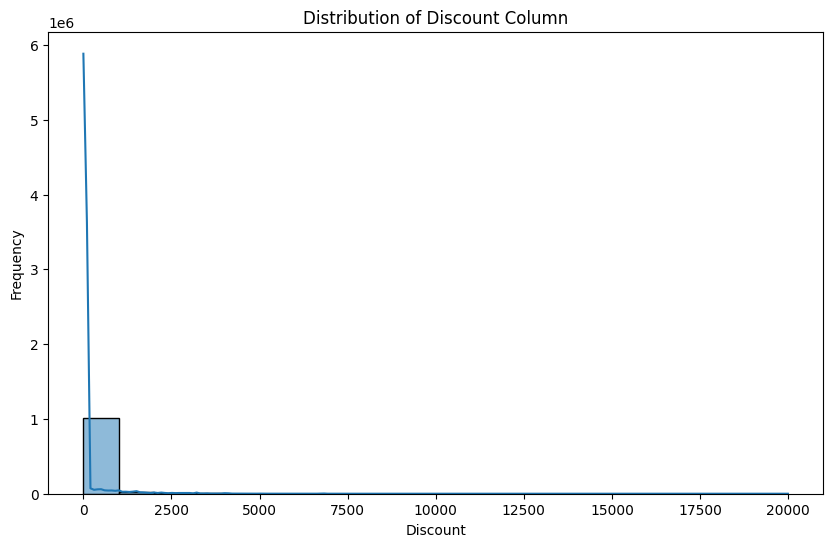

In [32]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], bins=20, kde=True)

# Set labels and title
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Column')

# Display the plot
plt.show()

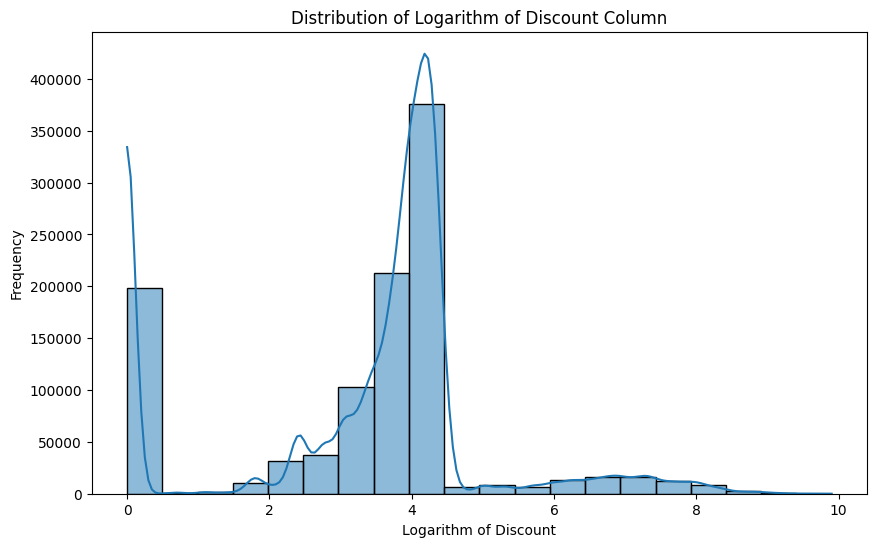

In [33]:
# Apply logarithmic transformation
log_discount = np.log(df['discount'] + 1)  # Adding 1 to avoid log(0)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(log_discount, bins=20, kde=True)

# Set labels and title
plt.xlabel('Logarithm of Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Discount Column')

# Display the plot
plt.show()

In [34]:
top_10_products = df.nlargest(10, 'discount')
print(top_10_products[['name', 'discount']])


                                             name  discount
235289                  Gold-Plated Jewellery Set     19996
269783                  Gold-Plated Jewellery Set     19996
706382  Ready to Wear Lehenga Blouse With Dupatta     18501
714474  Ready to Wear Lehenga Blouse With Dupatta     18501
728478                Ready to Wear Lehenga Choli     18501
728486                Ready to Wear Lehenga Choli     18501
729216                Ready to Wear Lehenga Choli     18501
729777                Ready to Wear Lehenga Choli     18501
828270    Floral Printed Pure Silk Ethnic Dresses     18501
881286  Ready to Wear Lehenga Blouse With Dupatta     18501


In [35]:
df.columns

Index(['name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount', 'seller'], dtype='object')

## 4.7 seller

In [36]:
seller_counts = df['seller'].value_counts()
print(seller_counts)

Roadster           10651
H&M                 6667
Puma                6579
max                 6486
Anouk               6158
                   ...  
Auggmin                1
BS AMOR                1
Bodyguard              1
TRU HAIR               1
Zainab chottani        1
Name: seller, Length: 5496, dtype: int64


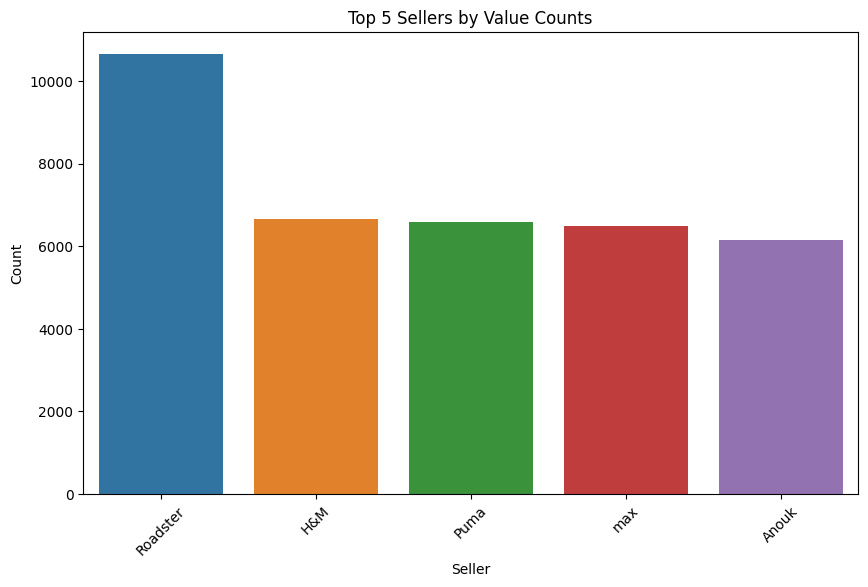

In [37]:
# Get the top 5 sellers by value counts
top_5_sellers = df['seller'].value_counts().head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_sellers.index, y=top_5_sellers.values)

# Set labels and title
plt.xlabel('Seller')
plt.ylabel('Count')
plt.title('Top 5 Sellers by Value Counts')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Here we see the top 5 sellers on Myntra by product listing:**
1. Roadster
2. H&M
3. Puma
4. max
5. Anouk

## 4.8 Highest Rated Product
products with the highest rating, considering the 'rating' column as the primary criterion and the 'ratingTotal' column as the secondary criterion in case of a tie

In [38]:
top_rated_products = df.sort_values(by=['rating', 'ratingTotal'], ascending=[False, False])
top_rated_products = top_rated_products.head(10)
print(top_rated_products[['name', 'rating', 'ratingTotal']])


                                 name  rating  ratingTotal
180080  Brightening Foaming Face Wash     5.0          264
245742  Brightening Foaming Face Wash     5.0          264
376871  Brightening Foaming Face Wash     5.0          264
379391  Brightening Foaming Face Wash     5.0          264
126865      Multigreens Face Cleanser     5.0          174
128126      Multigreens Face Cleanser     5.0          174
195941      Multigreens Face Cleanser     5.0          174
131946      Soulfood Body Scrub 175 g     5.0           89
199389      Soulfood Body Scrub 175 g     5.0           89
443599      Soulfood Body Scrub 175 g     5.0           89
